In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [2]:
np.random.seed(123)

In [3]:
#Importing the datasets
df = pd.read_csv(r"C:\Users\diban\OneDrive\Documents\Yuri\SeoulBikeData.csv", encoding= 'unicode_escape')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
#Checking for null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [5]:
#Dropping the data column
df.drop("Date",axis=1,inplace=True)




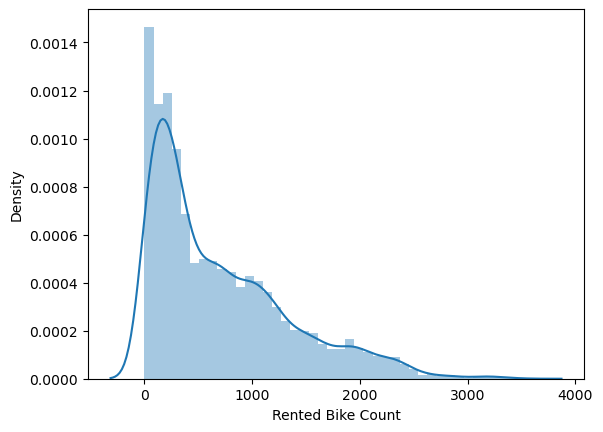

In [6]:
#Checking the distribution of the rwesponse variable
sns.distplot(df["Rented Bike Count"]);

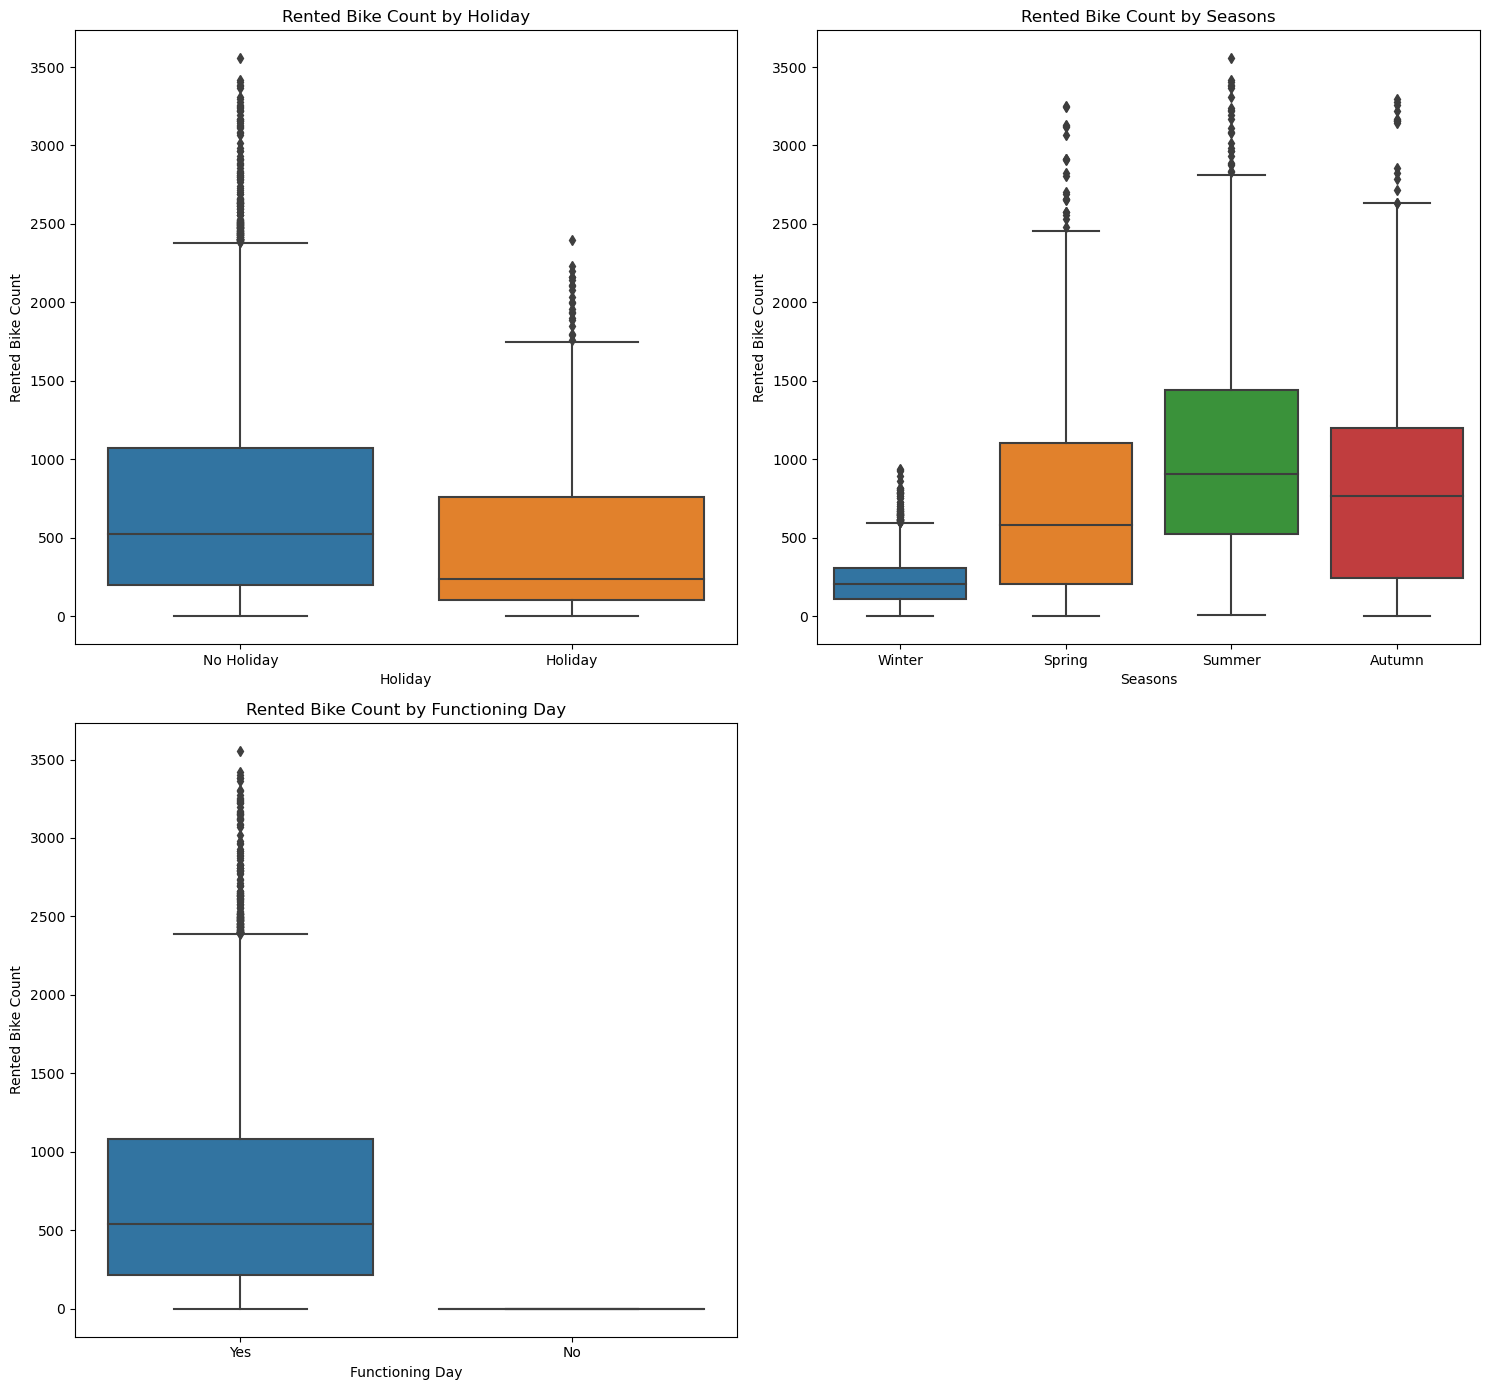

In [7]:
# Create a figure with a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 14))

# Plot the first boxplot in the top left
sns.boxplot(x="Holiday", y="Rented Bike Count", data=df, ax=axes[0, 0])
axes[0, 0].set_title('Rented Bike Count by Holiday')

# Plot the second boxplot in the top right
sns.boxplot(x="Seasons", y="Rented Bike Count", data=df, ax=axes[0, 1])
axes[0, 1].set_title('Rented Bike Count by Seasons')

# Plot the third boxplot in the bottom left
sns.boxplot(x="Functioning Day", y="Rented Bike Count", data=df, ax=axes[1, 0])
axes[1, 0].set_title('Rented Bike Count by Functioning Day')

# Hide the empty subplot in the bottom right
axes[1, 1].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

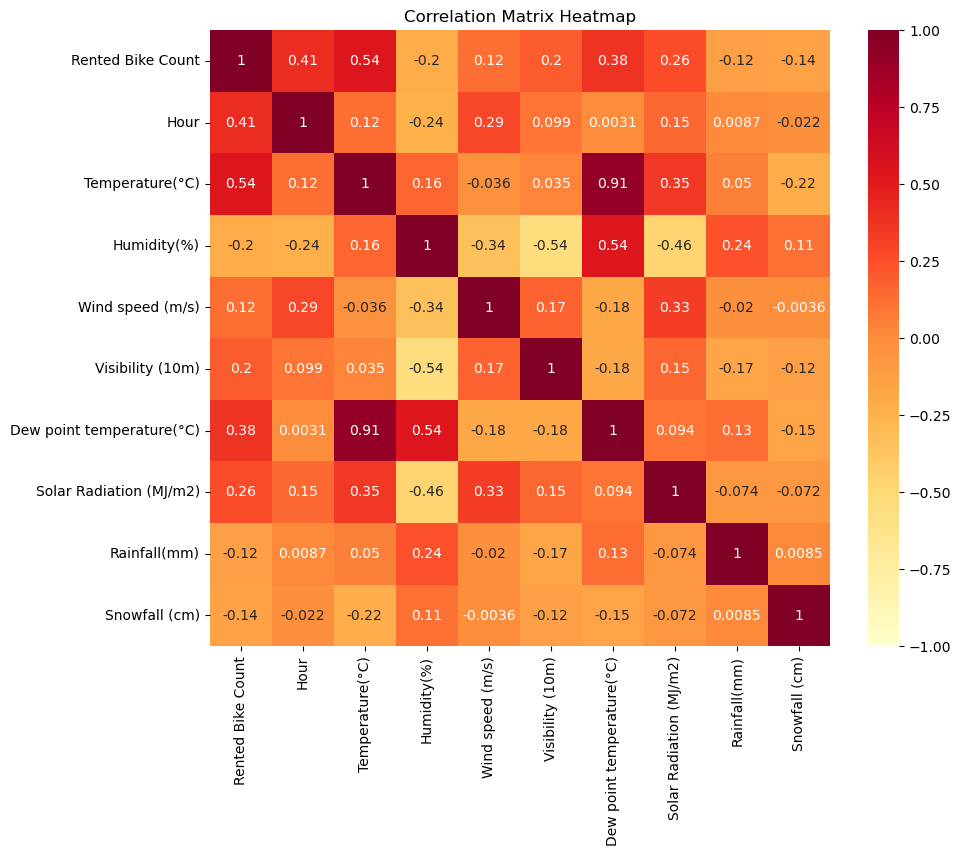

In [8]:
# Assuming df is your DataFrame
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix with a red to yellow color scheme
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [9]:
#Getting the data statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [10]:
#Separating the response variables and the explanatory variables
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
print(X)
print(y)

[[0 -5.2 37 ... 'Winter' 'No Holiday' 'Yes']
 [1 -5.5 38 ... 'Winter' 'No Holiday' 'Yes']
 [2 -6.0 39 ... 'Winter' 'No Holiday' 'Yes']
 ...
 [21 2.6 39 ... 'Autumn' 'No Holiday' 'Yes']
 [22 2.1 41 ... 'Autumn' 'No Holiday' 'Yes']
 [23 1.9 43 ... 'Autumn' 'No Holiday' 'Yes']]
[254 204 173 ... 694 712 584]


In [11]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, -1] = le.fit_transform(X[:,-1])
X[:, -2] = le.fit_transform(X[:,-2])
print(X)

[[0 -5.2 37 ... 'Winter' 1 1]
 [1 -5.5 38 ... 'Winter' 1 1]
 [2 -6.0 39 ... 'Winter' 1 1]
 ...
 [21 2.6 39 ... 'Autumn' 1 1]
 [22 2.1 41 ... 'Autumn' 1 1]
 [23 1.9 43 ... 'Autumn' 1 1]]


In [12]:
#Doing one hot encoding on the Season variable
# One Hot Encoding the "Seasons" column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[0.0 0.0 0.0 ... 0.0 1 1]
 [0.0 0.0 0.0 ... 0.0 1 1]
 [0.0 0.0 0.0 ... 0.0 1 1]
 ...
 [1.0 0.0 0.0 ... 0.0 1 1]
 [1.0 0.0 0.0 ... 0.0 1 1]
 [1.0 0.0 0.0 ... 0.0 1 1]]


In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
# Feature Scaling the training datasets
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
# Initializing the ANN
#pip install tensorflow keras --upgrade
from tensorflow import keras
ann = tf.keras.models.Sequential()

In [16]:
from tensorflow.keras import regularizers

# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=2, 
                              activation='relu', 
                              kernel_regularizer=regularizers.l1(0.0001)))


In [17]:
# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1))

In [18]:
# Compiling the ANN
#adam for stochastic gradiient decents weight update 
# Compile the ANN with metrics
ann.compile(optimizer='adam', 
            loss='mean_squared_error')

In [19]:
# Training the ANN on the Training set
ann.fit(X_train, y_train, batch_size = 32,validation_data=(X_test,y_test),  epochs = 400)

Epoch 1/400
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 913934.5000 - val_loss: 888269.7500
Epoch 2/400
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 909272.0625 - val_loss: 884906.3750
Epoch 3/400
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 919678.5625 - val_loss: 879232.7500
Epoch 4/400
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 915210.6875 - val_loss: 870761.3750
Epoch 5/400
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 915105.3750 - val_loss: 859464.3125
Epoch 6/400
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 880184.4375 - val_loss: 846046.7500
Epoch 7/400
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 840952.4375 - val_loss: 831111.2500
Epoch 8/400
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 857403.0625 - val_loss: 814700.2500
Epoch 9/400
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 813813.1250 - val_loss: 797198.8750
Epoch 10/400
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 837604.9375 - val_loss: 778845.9375
Epoch 11/400
219/219 ━━━━━━━━

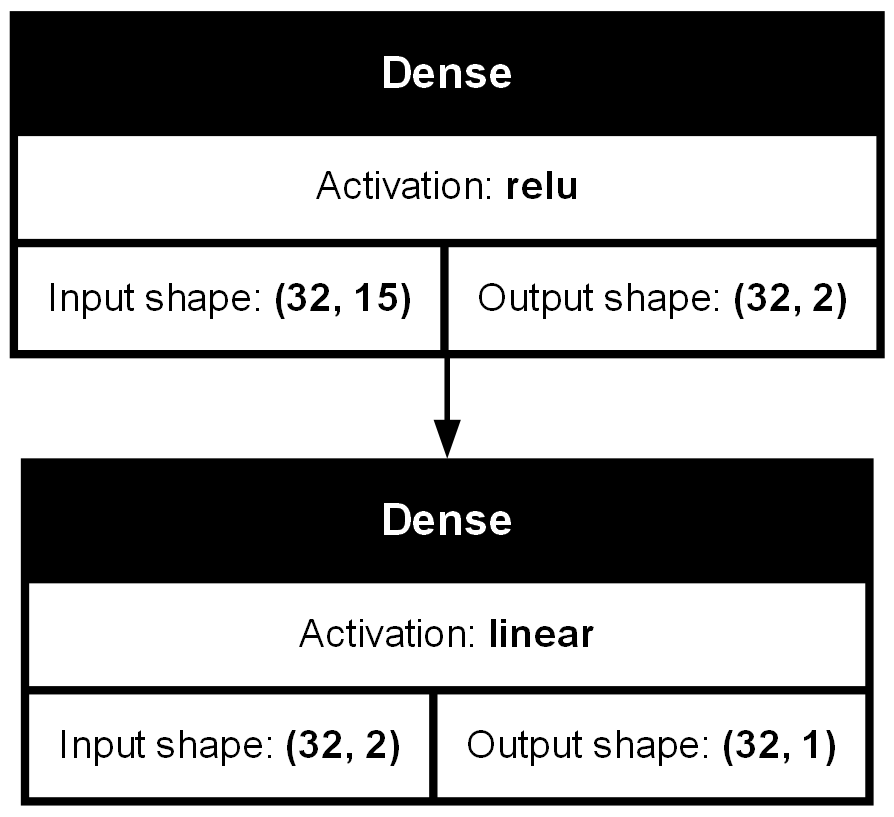

In [20]:
# Plot the neural network architecture
tf.keras.utils.plot_model(ann, show_shapes=True,show_layer_activations= True)



<Axes: >

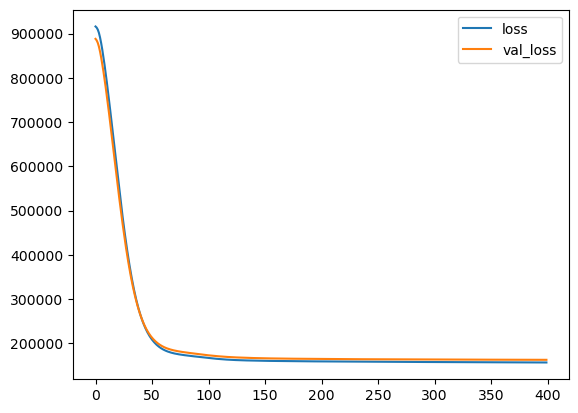

In [21]:
losses= pd.DataFrame(ann.history.history)
losses.plot()

In [22]:

from sklearn.metrics import mean_squared_error
# Calculate RMSE on the test set
predictions = ann.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Root Mean Squared Error (RMSE): 403.31108800819885


# Determining the best model parameters

In [23]:
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.regularizers import l1, l2
from sklearn.base import BaseEstimator, RegressorMixin

# Custom Keras model function
def create_model(layers=1, neurons=12, activation='relu', kernel_regularizer=None):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Use Input(shape) as the first layer
    model.add(Dense(neurons, activation=activation, kernel_regularizer=kernel_regularizer))
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation=activation, kernel_regularizer=kernel_regularizer))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Custom KerasRegressor wrapper for scikit-learn
class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, layers=1, neurons=12, activation='relu', kernel_regularizer=None, epochs=100, batch_size=32, verbose=0):
        self.layers = layers
        self.neurons = neurons
        self.activation = activation
        self.kernel_regularizer = kernel_regularizer
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model = None

    def fit(self, X, y):
        self.model = create_model(layers=self.layers, neurons=self.neurons, activation=self.activation, kernel_regularizer=self.kernel_regularizer)
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
        return self

    def predict(self, X):
        return self.model.predict(X)
    
    def get_params(self, deep=True):
        return {
            'layers': self.layers,
            'neurons': self.neurons,
            'activation': self.activation,
            'kernel_regularizer': self.kernel_regularizer,
            'epochs': self.epochs,
            'batch_size': self.batch_size,
            'verbose': self.verbose
        }

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

# Define parameter grid for grid search
param_grid = {
    'layers': [1, 2, 3],  # Number of hidden layers
    'neurons': [32, 64, 82],  # Neurons per layer
    'activation': ['relu', 'sigmoid'],  # Activation function
    'kernel_regularizer': [None, l1(0.01), l1(0.001), l1(0.0001)],  # Regularization
    'epochs': [50, 100],  # Number of epochs
    'batch_size': [16, 32]  # Batch size
}

# Create custom KerasRegressor wrapper
model = KerasRegressorWrapper()

# Perform grid search with cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error')
grid_result = grid_search.fit(X_train, y_train)

# Report best parameters and results
print("Best Parameters:", grid_result.best_params_)
print("Best MSE:", -grid_result.best_score_)


# Rebuilding  model using the best model parameters

In [24]:
# Initializing the ANN
from tensorflow.keras import regularizers

from tensorflow import keras
ann2 = tf.keras.models.Sequential()

In [25]:
# Adding the input layer and the first hidden layer
ann2.add(tf.keras.layers.Dense(units=32, 
                              activation='relu', 
                              kernel_regularizer=regularizers.l1(0.001)))

In [26]:
# Adding the input layer and the 2nd hidden layer
ann2.add(tf.keras.layers.Dense(units=32, 
                              activation='relu', 
                              kernel_regularizer=regularizers.l1(0.001)))

In [27]:
# Adding the input layer and the 3rd hidden layer
ann2.add(tf.keras.layers.Dense(units=32, 
                              activation='relu', 
                              kernel_regularizer=regularizers.l1(0.001)))

In [28]:
# Adding the output layer
ann2.add(tf.keras.layers.Dense(units=1))

In [29]:
# Compile the ANN with metrics
ann2.compile(optimizer='adam', 
            loss='mean_squared_error')

In [30]:
# Training the ANN on the Training set
ann2.fit(X_train, y_train, batch_size = 32,validation_data=(X_test,y_test),  epochs = 200)

Epoch 1/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 832405.2500 - val_loss: 210981.2188
Epoch 2/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 184054.5938 - val_loss: 170679.3438
Epoch 3/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 160358.5000 - val_loss: 162790.3438
Epoch 4/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 147789.7812 - val_loss: 157780.6562
Epoch 5/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 150520.7188 - val_loss: 154830.6406
Epoch 6/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 150704.6719 - val_loss: 152913.3125
Epoch 7/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 150726.0781 - val_loss: 151007.2500
Epoch 8/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 148652.6562 - val_loss: 148219.7500
Epoch 9/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 149460.3125 - val_loss: 146400.7656
Epoch 10/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 145589.3125 - val_loss: 145720.3125
Epoch 11/200
219/219 ━━━━━━━━

<Axes: >

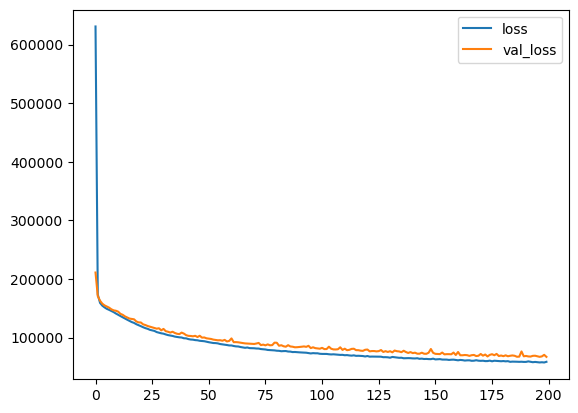

In [31]:
Losses1=pd.DataFrame(ann2.history.history)
Losses1.plot()

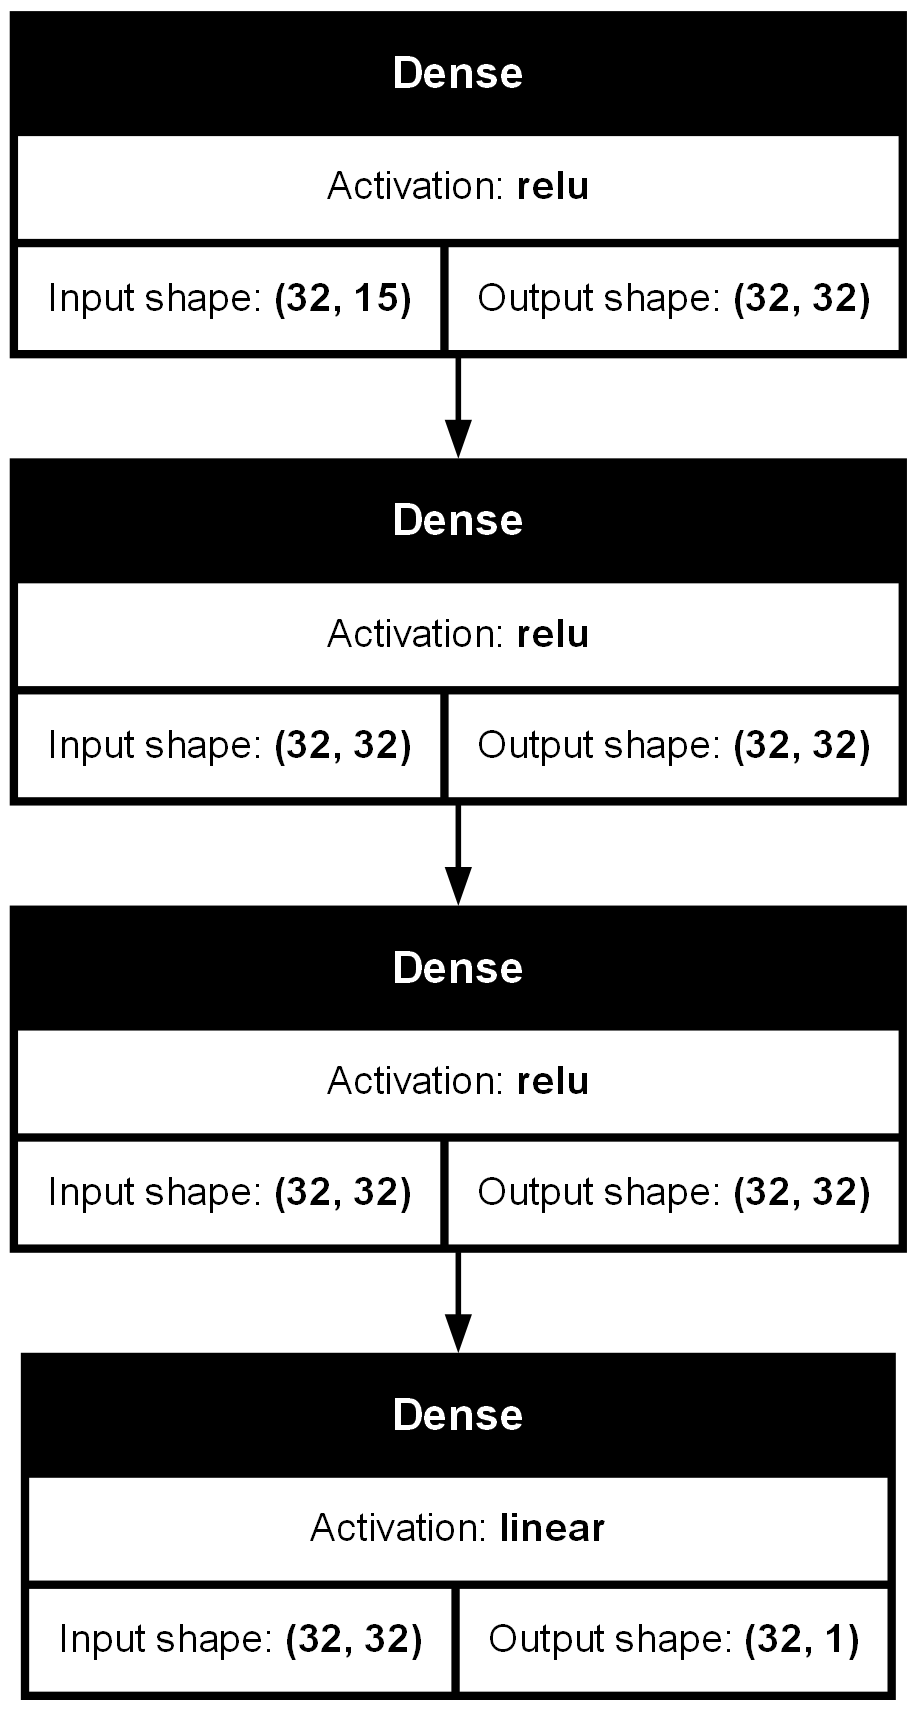

In [32]:
# Plot the neural network architecture
tf.keras.utils.plot_model(ann2, show_shapes=True,show_layer_activations= True)

In [33]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
# Calculate RMSE on the test set
predictions1 = ann2.predict(X_test)
rmse1 = mean_squared_error(y_test, predictions1, squared=False)
print("Root Mean Squared Error (RMSE):", rmse1)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Root Mean Squared Error (RMSE): 258.9402813515953


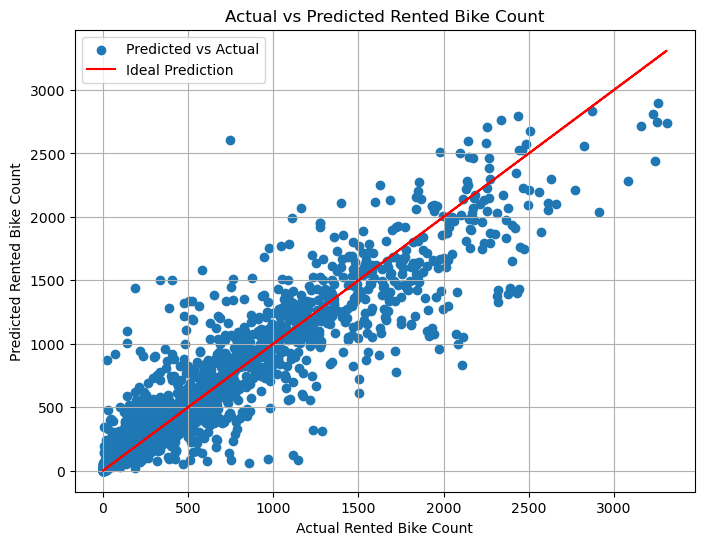

In [34]:
# Plotting the test against the predicted data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions1, label='Predicted vs Actual')
plt.plot(y_test, y_test, 'r', label='Ideal Prediction')
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title('Actual vs Predicted Rented Bike Count')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test,predictions1)

0.8399031104425092

# Variable Importance for best model

PermutationExplainer explainer: 1753it [03:21,  8.27it/s]                          


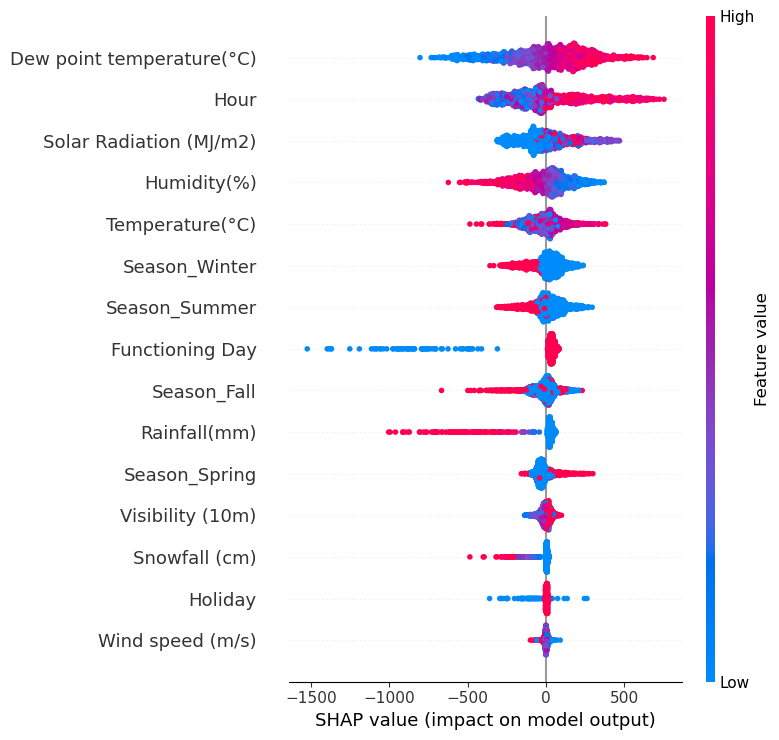

In [50]:

import shap

# trained Keras model 'ann2'
explainer = shap.Explainer(ann2, X_train)
shap_values = explainer(X_test)

# Get column names after one-hot encoding
ohe_categories = ['Spring', 'Summer', 'Fall', 'Winter']  
season_feature_names = [f'Season_{category}' for category in ohe_categories]

# Other feature names
other_feature_names = ['Hour', 'Temperature(°C)', 'Humidity(%)',
                       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
                       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
                       'Holiday', 'Functioning Day']

# Concatenate feature names
feature_names = season_feature_names + other_feature_names

# Plot the SHAP values with original feature names
shap.summary_plot(shap_values, X_test, feature_names=feature_names)




# Varible importance for model in (a)

PermutationExplainer explainer: 1753it [02:16, 11.75it/s]                          


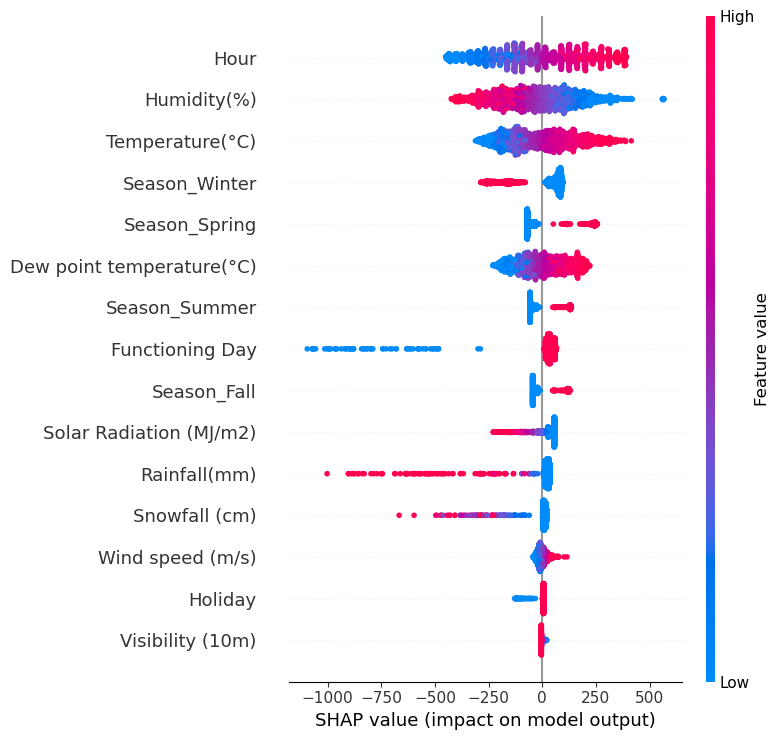

In [53]:
# trained Keras model 'ann2'
explainer = shap.Explainer(ann, X_train)
shap_values = explainer(X_test)

# Get column names after one-hot encoding
ohe_categories = ['Spring', 'Summer', 'Fall', 'Winter'] 
season_feature_names = [f'Season_{category}' for category in ohe_categories]

# Other feature names
other_feature_names = ['Hour', 'Temperature(°C)', 'Humidity(%)',
                       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
                       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
                       'Holiday', 'Functioning Day']

# Concatenate feature names
feature_names = season_feature_names + other_feature_names

# Plot the SHAP values with original feature names
shap.summary_plot(shap_values, X_test, feature_names=feature_names)
